# Project on H1 VISA DataSet Analysis
### By Sai Charan Gadiraju

## What is H-1B VISA?
- H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. 
- For a foreign national to apply for H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. 
- This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.
- The duration of stay is three years, extendable to six years, after which the visa holder may need to reapply.

### Data Source
- **Data Provider**: U.S. Department of Labor, ETA
- **Dataset Link**: [PERM Program - Fiscal Year 2022, 2021, 2020, 2019, 2018, 2017 Disclosure Files](https://www.kaggle.com/datasets/jishnukoliyadan/lca-programs-h1b-h1b1-e3-visa-petitions)
- **Data Description**: The dataset consists of disclosure files for the PERM program, a labor certification program for employers seeking to hire foreign workers for permanent employment in the United States.

# Data

- The dataset consists of last six years information (2017-2022)
- Source: [Dataset Source](https://www.kaggle.com/datasets/jishnukoliyadan/lca-programs-h1b-h1b1-e3-visa-petitions)  U.S. Department of Labor, ETA
- Data Size: 454.7+ MB
- Data Shape (Number of Rows and Columns): Number of rows: 3973349, Number of columns: 14 
- Every row describes applicant information.
- Columns:
  - Visa_Class -  It typically refers to the category or type of visa that an individual is applying for, such as H-1B, H-1B1, E-3, etc.
  - EMPLOYER_NAME - Legal business name of employer requesting permanent labor certification.
  - SOC_Title - It refers to the Standard Occupational Classification (SOC) title, which is a standardized system used to classify and categorize occupations in the United States.
  - Job_Title - It refers to the specific designation or title associated with a particular employment position held by an individual, often indicating the nature or type of work they perform within an organization.
  - Full_Time_Position - It typically denotes whether a job or position is designated as a full-time role, indicating that the employee is expected to work a standard number of hours per week, usually 35-40 hours, depending on the organization's policy.
  - Worksite - "Worksite" refers to the physical location or geographical site where an employee performs their job duties. In the context of visa applications, it could represent the specific location or address of the employer where the work is primarily carried out.
  - Prevailing_Wage - "Prevailing_Wage" is the average wage paid to similarly employed workers in a specific occupation in a particular geographic area, as determined by the U.S. Department of Labor. It serves as a baseline to ensure that foreign workers are not being paid less than the average for their job and location.
  - Unit_Of_Pay - It refers to the measurement or basis used to specify the compensation for a particular job, such as hourly, weekly, monthly, or annually. It indicates how the salary or wage for a position is calculated and presented.
  - Employer_Location - It refers to the geographic location or address where the employer's main office or headquarters is situated.
  - Employer_Country - It refers to the country where the employer is based or headquartered. It signifies the home country of the organization submitting the visa application.
  - CASE_STATUS - Status associated with the last significant event or decision. Valid values include “Certified”, “Certified-Expired”, “Denied”, and “Withdrawn”. 
  -  Year - It indicates the year of applications.

### Target Variable- CASE_STATUS - Valid values include “Certified”, “Certified-Expired”, “Denied”, and “Withdrawn”

## Project Objective

The primary objective of this data science project is to explore, analyze, and gain insights from the PERM program disclosure data for the fiscal years 2022, 2021, 2020, 2019, 2018 and 2017. I aim to answer various research questions, uncover trends, and provide valuable information.

# Research Questions

"What are the trends and patterns in H1B visa applications in the United States from 2017 to 2022, focusing on factors such as the overall growth in the number of applications, the top companies providing H1B sponsorships, key roles in demand, salary distributions for these roles, characteristics of data-related roles, acceptance and rejection rates, and geographical concentrations of applications across different parts of the United States?"

## 1. Understanding the Dataset:

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from IPython import display

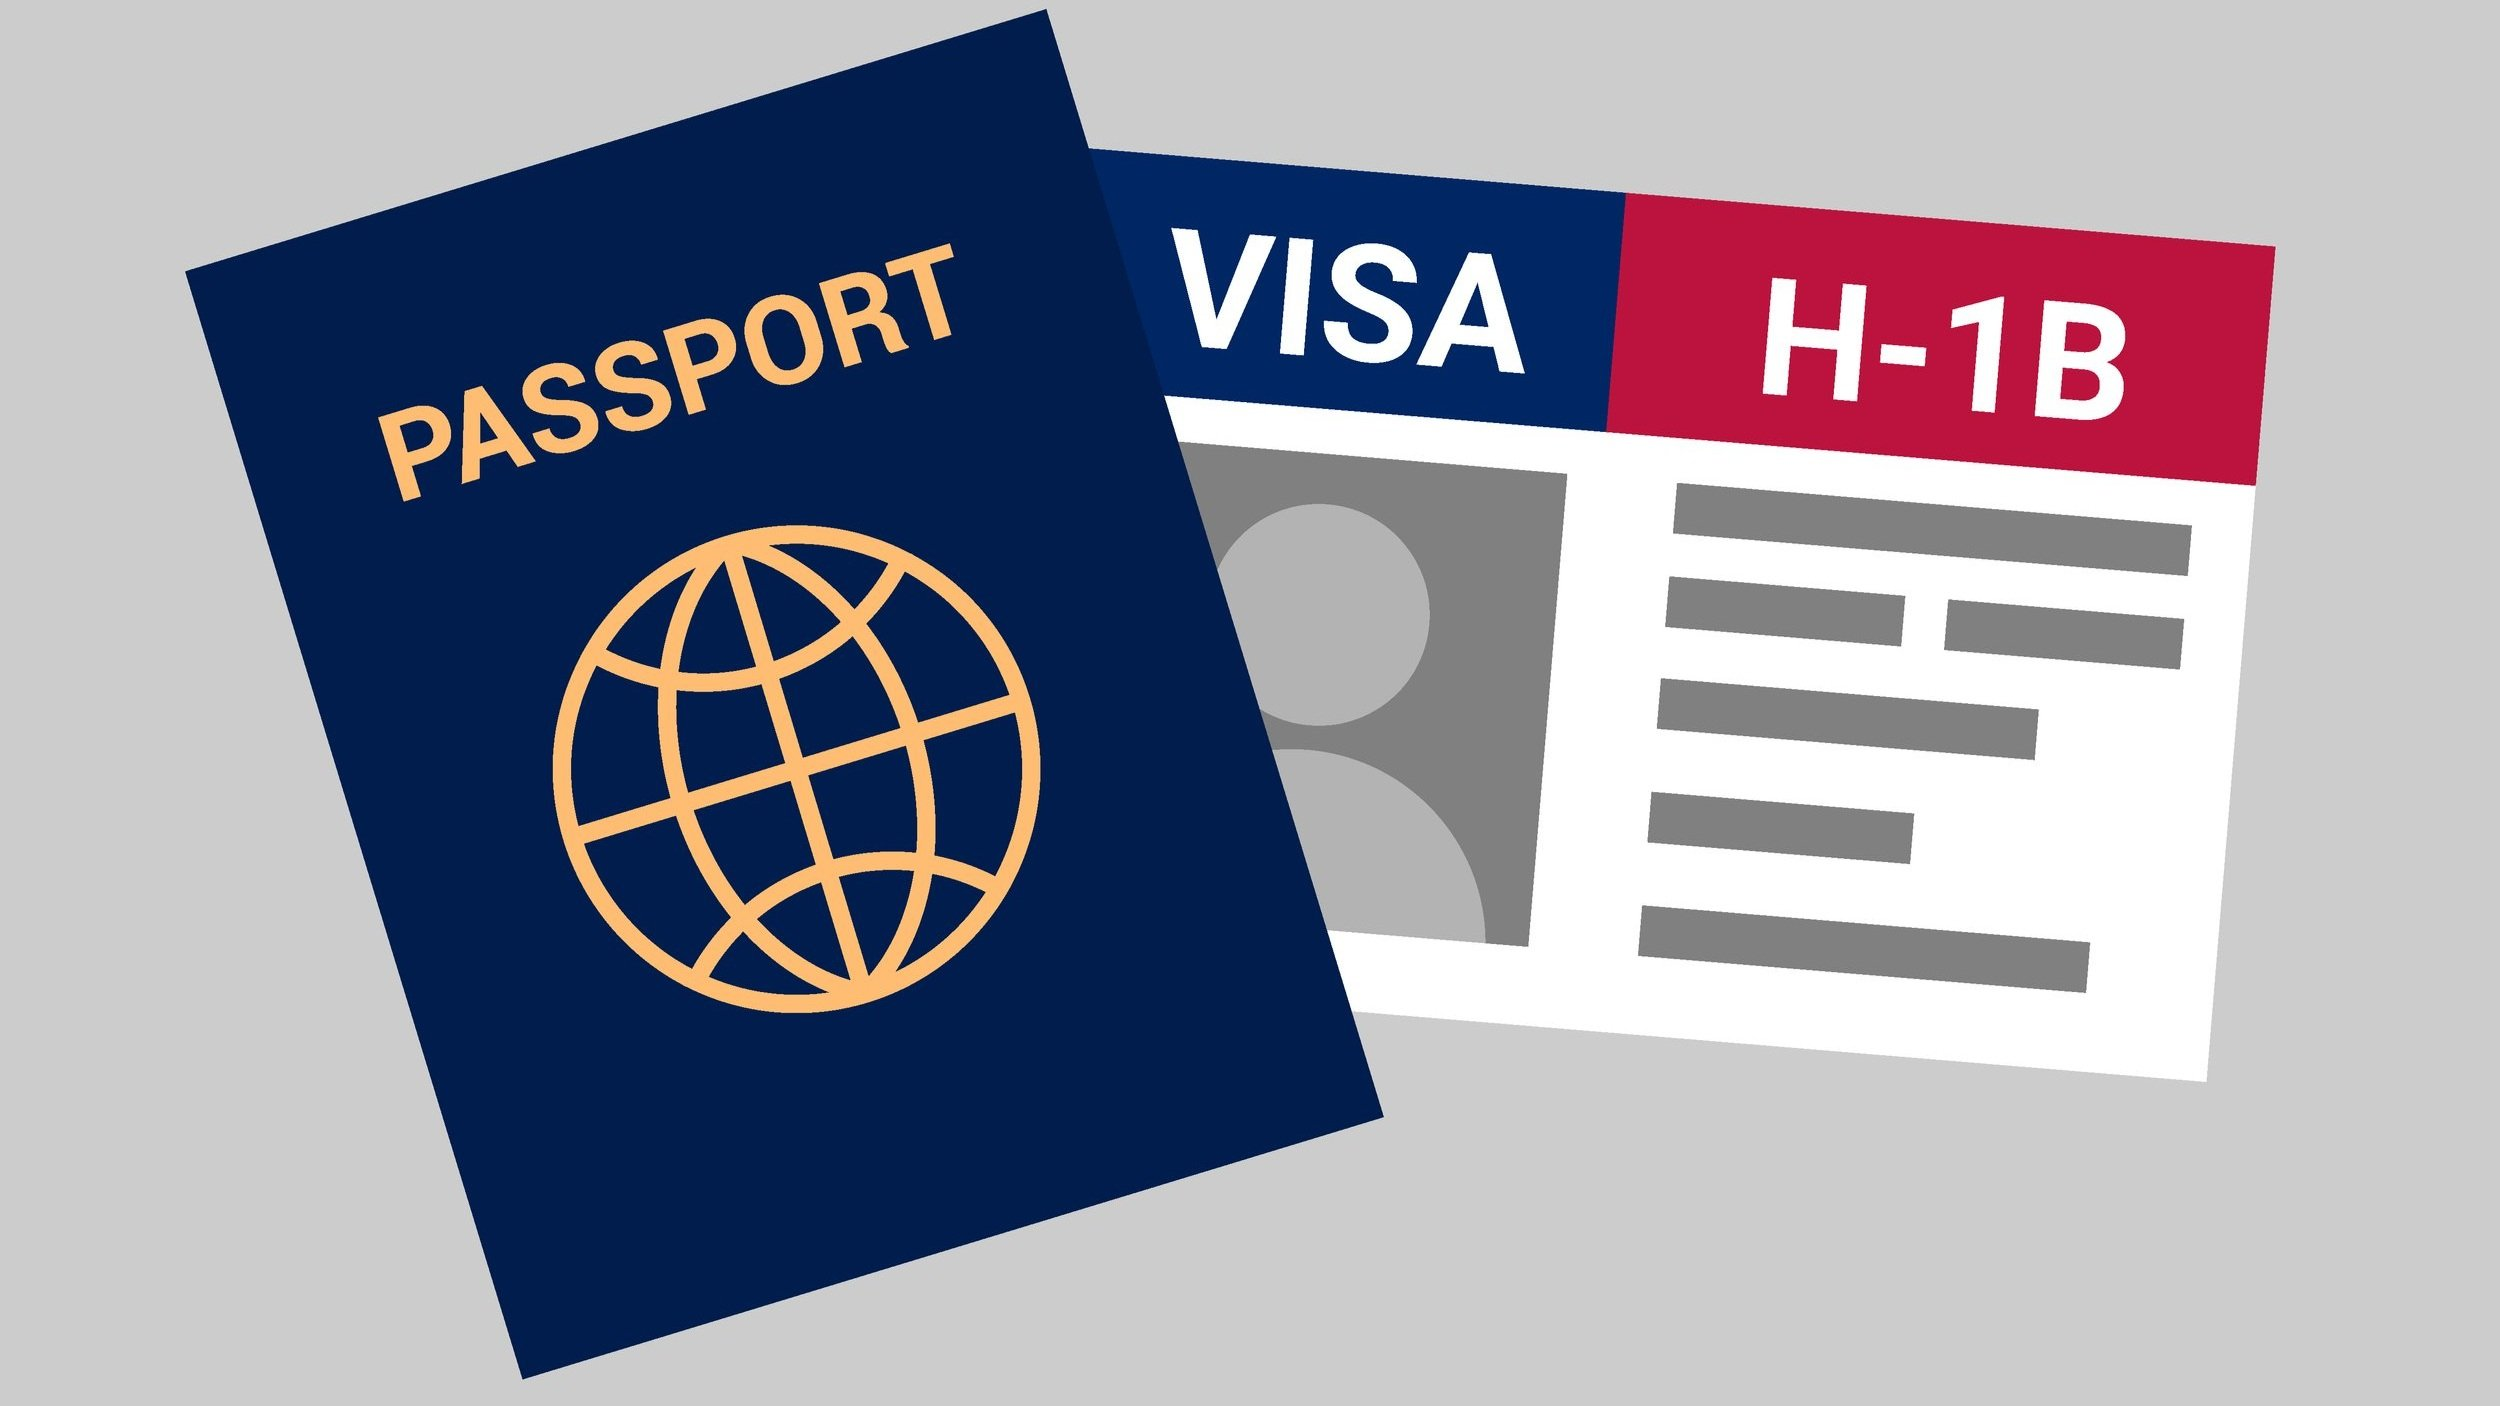

In [4]:
from IPython.display import Image

# Specify the full path to the image on your PC
image_path = "C:/Users/SAI CHARAN/Downloads/visa_h1b_13.jpg"  # Replace with the actual path to your image

# Display the image in the Jupyter Notebook
Image(filename=image_path)

###  1.1 Begin by loading the dataset and understanding its structure.

In [5]:
df_2017 = pd.read_csv("downloads/archive/LCA_FY_2017.csv")
df_2018 = pd.read_csv("downloads/archive/LCA_FY_2018.csv")
df_2019 = pd.read_csv("downloads/archive/LCA_FY_2019.csv")
df_2020 = pd.read_csv("downloads/archive/LCA_FY_2020.csv")
df_2021 = pd.read_csv("downloads/archive/LCA_FY_2021.csv")
df_2022 = pd.read_csv("downloads/archive/LCA_FY_2022.csv")

C:\Users\SAI CHARAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(df_2017.shape,
df_2018.shape,
df_2019.shape,
df_2020.shape,
df_2021.shape,
df_2022.shape)

(624650, 11) (654360, 11) (664616, 11) (577334, 12) (826305, 12) (626084, 12)


In [7]:
# Add a "Year" column to each DataFrame
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020
df_2021['Year'] = 2021
df_2022['Year'] = 2022

Look at the columns, data types, and basic statistics to get a sense of the data.

In [8]:
# List of dataframes
dfs = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

# Print info for each dataframe
for i, df in enumerate(dfs, 1):
    print(f"DataFrame {i} Info:")
    print(df.info())

DataFrame 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624650 entries, 0 to 624649
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Visa_Class          624650 non-null  object 
 1   Employer_Name       624594 non-null  object 
 2   SOC_Title           624647 non-null  object 
 3   Job_Title           624645 non-null  object 
 4   Full_Time_Position  624645 non-null  object 
 5   Worksite            624629 non-null  object 
 6   Prevailing_Wage     624649 non-null  float64
 7   Unit_Of_Pay         624604 non-null  object 
 8   Employer_Location   624620 non-null  object 
 9   Employer_Country    528143 non-null  object 
 10  Case_Status         624650 non-null  object 
 11  Year                624650 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 57.2+ MB
None
DataFrame 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data c

In [9]:
df_2017['Case_Status'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [10]:
df_2018['Case_Status'].unique()

array(['CERTIFIED', 'DENIED', 'WITHDRAWN', 'CERTIFIED-WITHDRAWN'],
      dtype=object)

In [11]:
df_2019['Case_Status'].unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [12]:
df_2020['Case_Status'].unique()

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN'],
      dtype=object)

In [13]:
df_2021['Case_Status'].unique()

array(['Certified', 'Certified - Withdrawn', 'Denied', 'Withdrawn'],
      dtype=object)

In [14]:
df_2022['Case_Status'].unique()

array(['Certified', 'Certified - Withdrawn', 'Denied', 'Withdrawn'],
      dtype=object)

In [15]:
# Replace 'Certified' with 'CERTIFIED' in the 'Case_Status' column
df_2020['Case_Status'] = df_2020['Case_Status'].replace('Certified', 'CERTIFIED')
df_2021['Case_Status'] = df_2021['Case_Status'].replace('Certified', 'CERTIFIED')
df_2022['Case_Status'] = df_2022['Case_Status'].replace('Certified', 'CERTIFIED')

# Replace 'Certified - Withdrawn' with 'CERTIFIED-WITHDRAWN' in the 'Case_Status' column
df_2020['Case_Status'] = df_2020['Case_Status'].replace('Certified - Withdrawn', 'CERTIFIED-WITHDRAWN')
df_2021['Case_Status'] = df_2021['Case_Status'].replace('Certified - Withdrawn', 'CERTIFIED-WITHDRAWN')
df_2022['Case_Status'] = df_2022['Case_Status'].replace('Certified - Withdrawn', 'CERTIFIED-WITHDRAWN')

# Replace 'Denied' with 'DENIED' in the 'Case_Status' column
df_2020['Case_Status'] = df_2020['Case_Status'].replace('Denied', 'DENIED')
df_2021['Case_Status'] = df_2021['Case_Status'].replace('Denied', 'DENIED')
df_2022['Case_Status'] = df_2022['Case_Status'].replace('Denied', 'DENIED')

# Replace 'Withdrawn' with 'WITHDRAWN' in the 'Case_Status' column
df_2020['Case_Status'] = df_2020['Case_Status'].replace('Withdrawn', 'WITHDRAWN')
df_2021['Case_Status'] = df_2021['Case_Status'].replace('Withdrawn', 'WITHDRAWN')
df_2022['Case_Status'] = df_2022['Case_Status'].replace('Withdrawn', 'WITHDRAWN')

In [16]:
# merging all the six year data into one dataframe

In [17]:
merged_df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022], axis=0)

In [18]:
merged_df.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Employer_Country,Case_Status,Year,Wage_Rate_Of_Pay,Quarter
0,H-1B,DISCOVER PRODUCTS INC.,Computer Systems Analysts,ASSOCIATE DATA INTEGRATION,Y,"Riverwoods, Illinois",59197.0,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN,NaN
1,H-1B,DFS SERVICES LLC,Operations Research Analysts,SENIOR ASSOCIATE,Y,"Riverwoods, Illinois",49800.0,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN,NaN
2,H-1B,EASTBANC TECHNOLOGIES LLC,Computer Programmers,.NET SOFTWARE PROGRAMMER,Y,"Washington, District of Columbia",76502.0,Year,"Washington, District of Columbia",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN,NaN
3,H-1B,INFO SERVICES LLC,"Computer Occupations, All Other",PROJECT MANAGER,Y,"Jersey City, New Jersey",90376.0,Year,"Livonia, Michigan",United States Of America,WITHDRAWN,2017,NaN,NaN
4,H-1B,BB&T CORPORATION,Credit Analysts,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,Y,"New York, New York",116605.0,Year,"Wilson, North Carolina",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN,NaN


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3973349 entries, 0 to 626083
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Visa_Class          object 
 1   Employer_Name       object 
 2   SOC_Title           object 
 3   Job_Title           object 
 4   Full_Time_Position  object 
 5   Worksite            object 
 6   Prevailing_Wage     float64
 7   Unit_Of_Pay         object 
 8   Employer_Location   object 
 9   Employer_Country    object 
 10  Case_Status         object 
 11  Year                int64  
 12  Wage_Rate_Of_Pay    float64
 13  Quarter             object 
dtypes: float64(2), int64(1), object(11)
memory usage: 454.7+ MB


In [20]:
print("The shape of the dataset is : {}".format(merged_df.shape))

The shape of the dataset is : (3973349, 14)


In [21]:
print("There were around {} applications for H-1B Visa from 2017 to 2022.".format(merged_df.shape[0]))

There were around 3973349 applications for H-1B Visa from 2017 to 2022.


## 2. Data Cleaning:

In [23]:
# check how many non null values we have for each column
merged_df[merged_df.isnull()==True].count()    #Total nonnull values for each column

Visa_Class            0
Employer_Name         0
SOC_Title             0
Job_Title             0
Full_Time_Position    0
Worksite              0
Prevailing_Wage       0
Unit_Of_Pay           0
Employer_Location     0
Employer_Country      0
Case_Status           0
Year                  0
Wage_Rate_Of_Pay      0
Quarter               0
dtype: int64

## 3. Exploratory Data Analysis (EDA).

In [28]:
merged_df.Case_Status.value_counts()

CERTIFIED              3611457
CERTIFIED-WITHDRAWN     227347
WITHDRAWN               100097
DENIED                   34448
Name: Case_Status, dtype: int64

### 3.1 Number of Visa Applications by Status

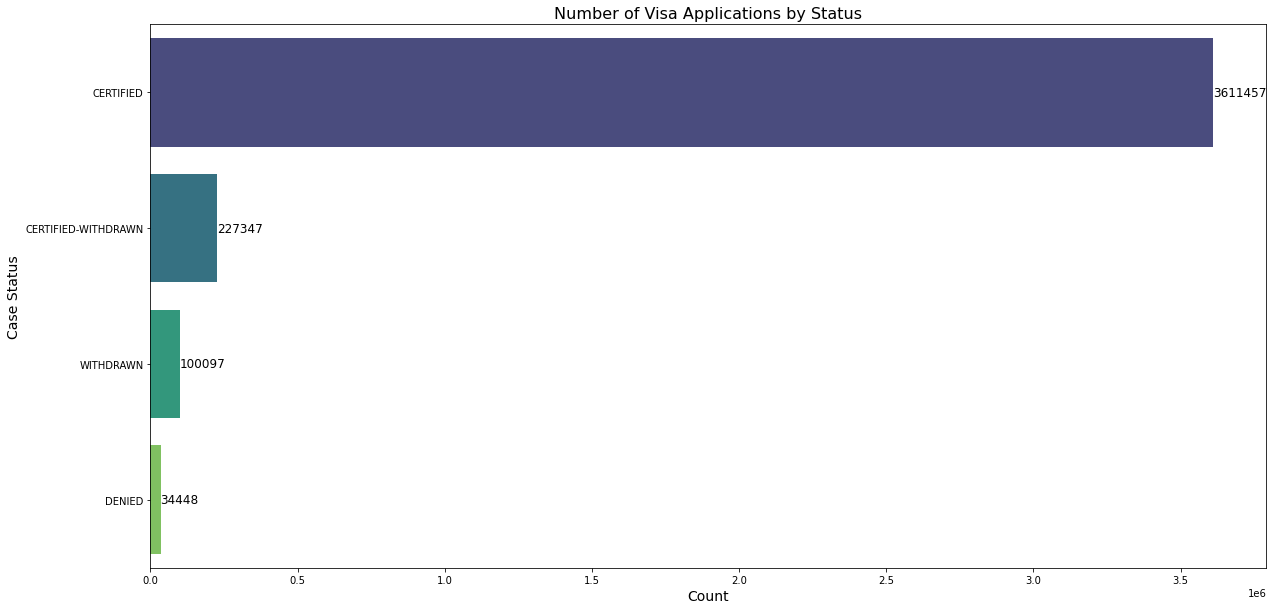

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame
plt.figure(figsize=(20, 10))

# Countplot with seaborn for better aesthetics
sns.countplot(y='Case_Status', data=merged_df, order=merged_df['Case_Status'].value_counts().index, palette='viridis')

# Adding labels and title
plt.title("Number of Visa Applications by Status", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Case Status", fontsize=14)

# Display the count values on the bars
for index, value in enumerate(merged_df['Case_Status'].value_counts()):
    plt.text(value, index, str(value), ha='left',va='center', fontsize=12)

# Display the plot
plt.show()

- There are approx. 3611457 Visa Applications having 'CERTIFIED' Status.
- Denial has the least 34448 over 2017-2022.

### 3.2 Number of Applications per year

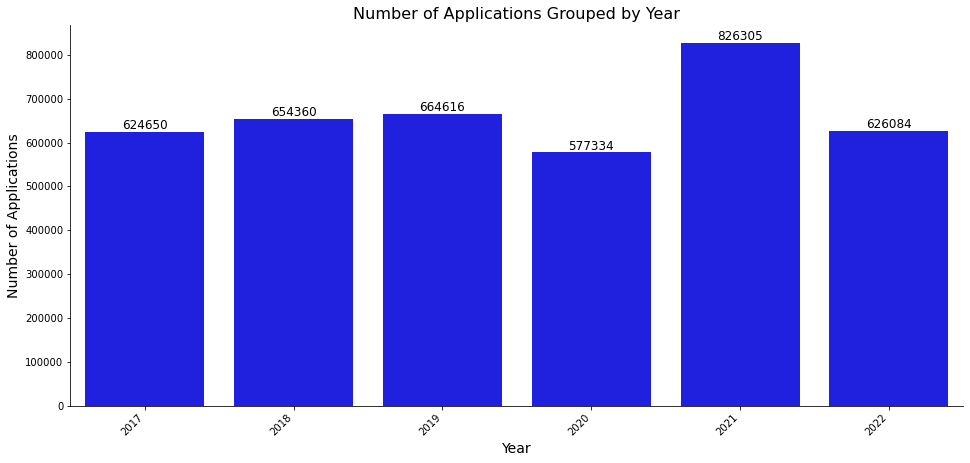

In [45]:

# Counting applications by year
year_counts = merged_df['Year'].value_counts().sort_index()

# Plot applications grouped by year
plt.figure(figsize=(16, 7))
ax = sns.barplot(x=year_counts.index, y=year_counts.values, color='blue')

# Adding labels and title
plt.title("Number of Applications Grouped by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Applications", fontsize=14)

# Display the count values on the bars
for index, value in enumerate(year_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Remove spines (top and right borders)
sns.despine()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


- The applications every year are almost the same, difference is almost 20000. But it decreases after 2019 and gradually increases in 2021, and has the highest number of applications.
- Again in 2022, it decreases by 200000.

### 3.3 Top 10 Applicants from 2017 to 2022

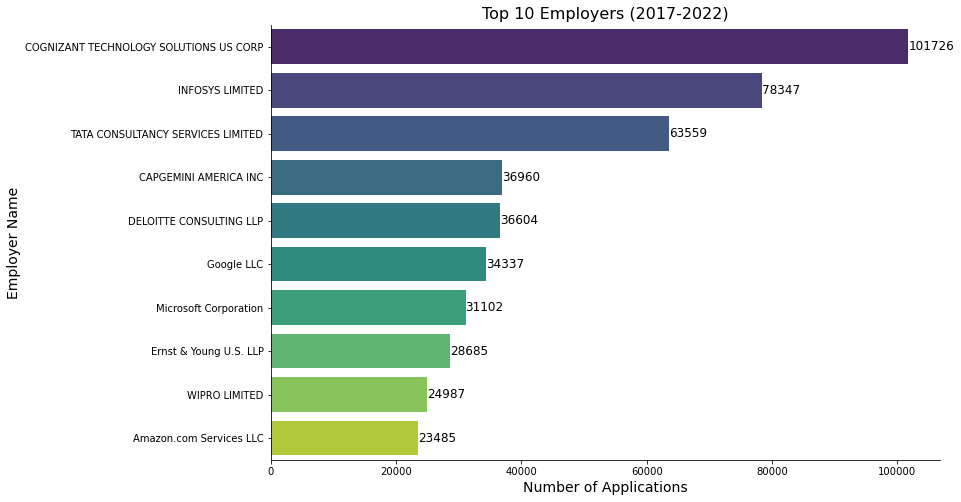

In [46]:
# Counting applications by employer name
top_employers = merged_df['Employer_Name'].value_counts().head(10)

# Plot top employers
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_employers.values, y=top_employers.index, palette='viridis')

# Adding labels and title
plt.title("Top 10 Employers (2017-2022)", fontsize=16)
plt.xlabel("Number of Applications", fontsize=14)
plt.ylabel("Employer Name", fontsize=14)

# Display the count values on the bars
for index, value in enumerate(top_employers.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=12)

# Remove spines (top and right borders)
sns.despine()

# Display the plot
plt.show()

- The Top 3 employers are Cognizant, Infosys, and Tata Consultancy Services. 

## 3.4 Analyzing full time and part time positions

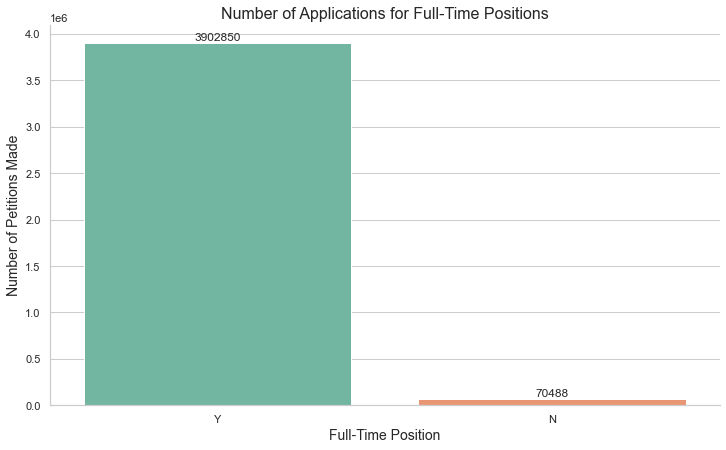

In [47]:
# Set the style to whitegrid
sns.set(style="whitegrid")

# Create a figure with Seaborn
plt.figure(figsize=(12, 7))
g = sns.countplot(x='Full_Time_Position', data=merged_df, palette='Set2')  # Adjust the palette if needed

# Adding labels and title
plt.title("Number of Applications for Full-Time Positions", fontsize=16)
plt.xlabel("Full-Time Position", fontsize=14)
plt.ylabel("Number of Petitions Made", fontsize=14)

# Display the count values on the bars
for index, value in enumerate(merged_df['Full_Time_Position'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Remove spines (top and right borders)
sns.despine()

# Display the plot
plt.show()

## 3.5 Counting applications by worksite

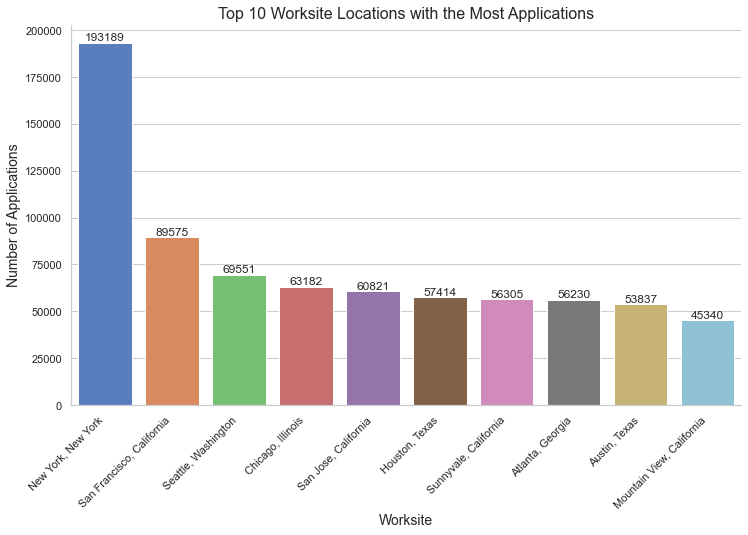

In [48]:
# Counting applications by worksite
worksite_counts = merged_df['Worksite'].value_counts().head(10)

# Plot applications grouped by worksite
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=worksite_counts.index, y=worksite_counts.values, palette='muted')  # Adjust the palette if needed

# Adding labels and title
plt.title("Top 10 Worksite Locations with the Most Applications", fontsize=16)
plt.xlabel("Worksite", fontsize=14)
plt.ylabel("Number of Applications", fontsize=14)

# Display the count values on the bars
for index, value in enumerate(worksite_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Remove spines (top and right borders)
sns.despine()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

## 3.6 Case status every year

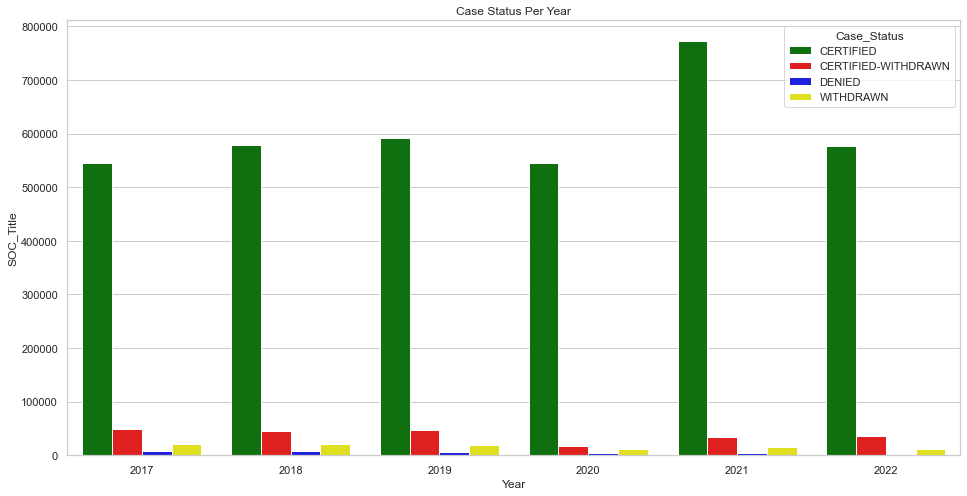

In [55]:
col = ['green','red','blue','yellow']
df1 = merged_df[merged_df['Case_Status'].isin(['CERTIFIED','DENIED','CERTIFIED-WITHDRAWN','WITHDRAWN'])]
df2 = merged_df.groupby(['Year','Case_Status'])['SOC_Title'].count().reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x = df2['Year'],y = df2['SOC_Title'],hue=df2['Case_Status'],palette=col)
plt.title("Case Status Per Year");